# Experiment 1 - Test the linear structure using aleatory generated networks

In [27]:
# external imports
import pandas as pd
import matplotlib.pyplot as plt

# Read the database
df = pd.read_csv("exp1_aleatory.csv")
df

,Unnamed: 0,i_sample,N_LOCAL_NETWORKS,N_VAR_NETWORK,V_TOPOLOGY,N_OUTPUT_VARIABLES,N_CLAUSES_FUNCTION,n_time_find_attractors,n_time_find_pairs,n_time_find_fields,n_local_attractors,n_pair_attractors,n_attractor_fields
0,0,1,3,5,4,2,2,0.070525,0.000024,0.000033,9,10,6
1,1,2,3,5,4,2,2,0.053577,0.000021,0.000027,8,8,4
2,2,3,3,5,4,2,2,0.070772,0.000028,0.000030,10,9,5
3,3,4,3,5,4,2,2,0.117262,0.000029,0.000101,20,32,28
4,4,5,3,5,4,2,2,0.085217,0.000025,0.000240,18,42,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,96,9,5,4,2,2,0.287757,0.000073,0.178687,56,132,10000
696,696,97,9,5,4,2,2,0.311733,0.000079,0.092850,62,155,4473
697,697,98,9,5,4,2,2,0.238216,0.000073,0.024049,44,87,1070
698,698,99,9,5,4,2,2,0.257406,0.000077,0.018939,44,92,1100


In [16]:
# Resume
print("Experiment Structural - Ring - Aleatory")
print("Number of samples:", df["i_sample"].max())
print("Range of local networks:", df["N_LOCAL_NETWORKS"].min(), " - ", df["N_LOCAL_NETWORKS"].max())

Experiment Structural - Ring - Aleatory
Number of samples: 100
Range of local networks: 3  -  9


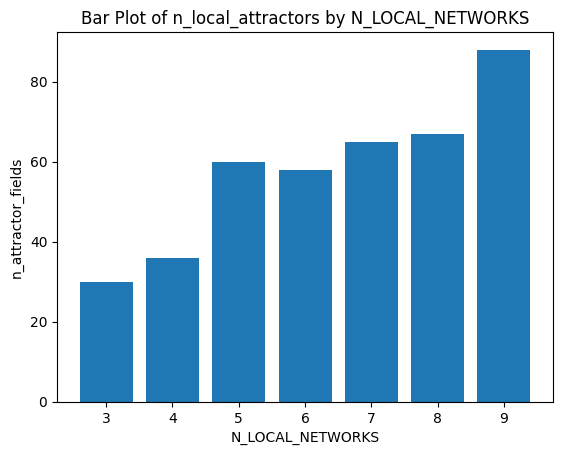

In [26]:
plt.bar(df["N_LOCAL_NETWORKS"], df["n_local_attractors"])
plt.xlabel('N_LOCAL_NETWORKS')
plt.ylabel('n_local_attractors')
plt.title('Bar Plot of n_local_attractors by N_LOCAL_NETWORKS')
plt.show()

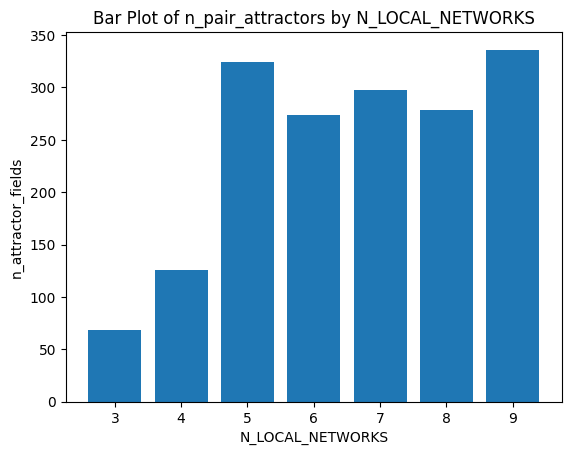

In [25]:


# Assuming df is your DataFrame containing the data
plt.bar(df["N_LOCAL_NETWORKS"], df["n_pair_attractors"])
plt.xlabel('N_LOCAL_NETWORKS')
plt.ylabel('n_attractor_fields')
plt.title('Bar Plot of n_pair_attractors by N_LOCAL_NETWORKS')
plt.show()

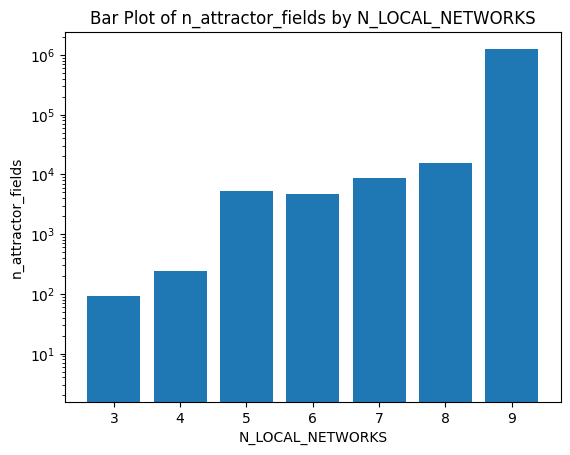

In [24]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
plt.bar(df["N_LOCAL_NETWORKS"], df["n_attractor_fields"])
plt.xlabel('N_LOCAL_NETWORKS')
plt.ylabel('n_attractor_fields')
plt.title('Bar Plot of n_attractor_fields by N_LOCAL_NETWORKS')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.show()


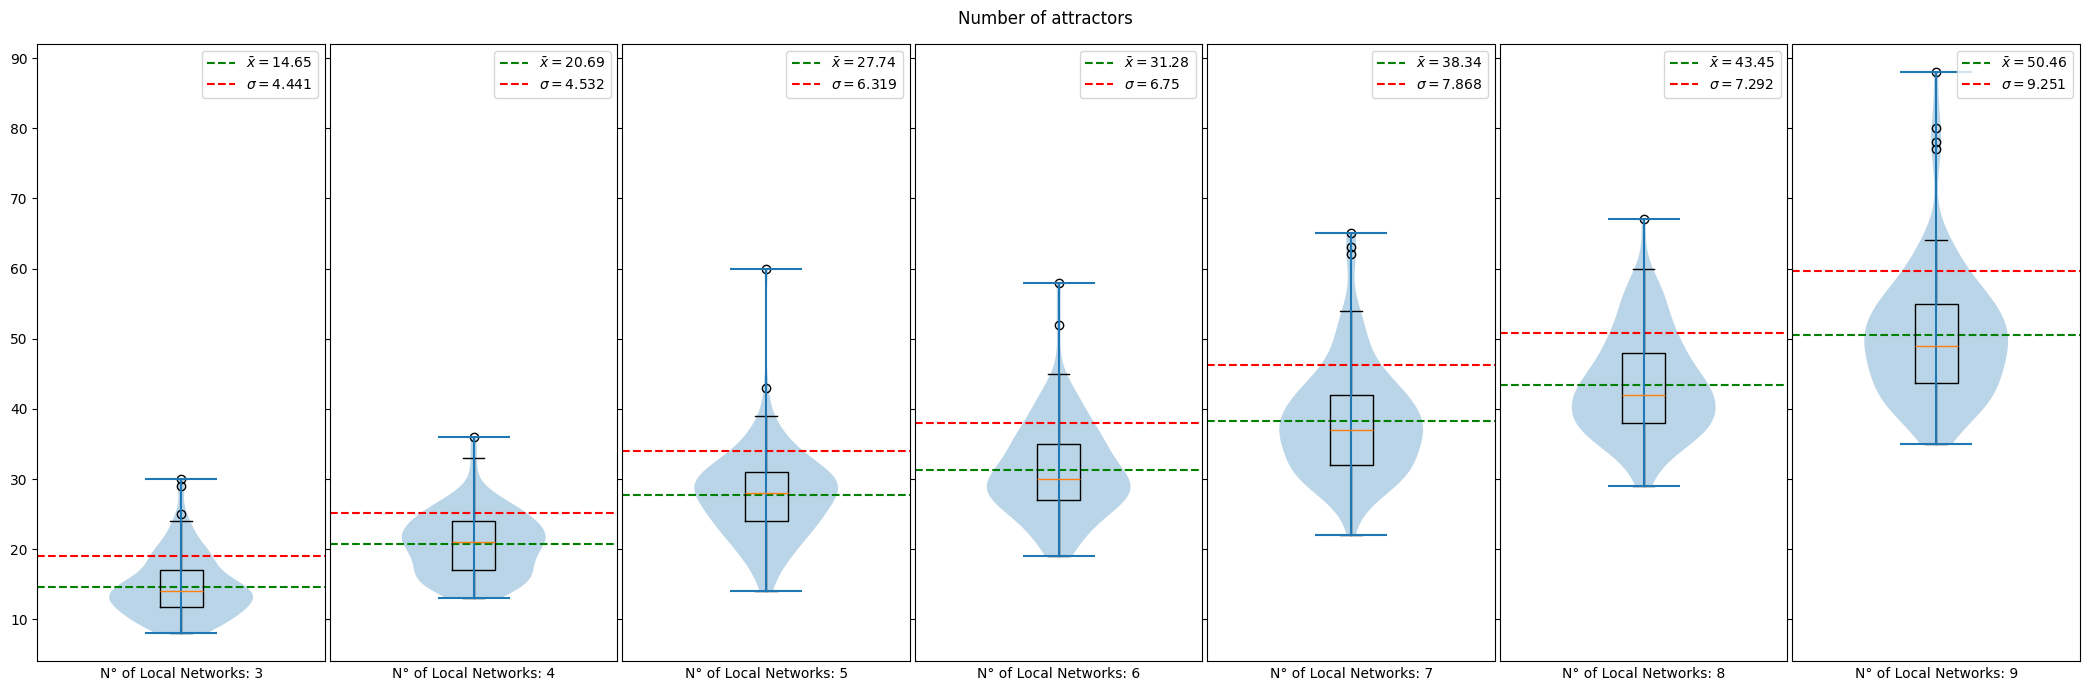

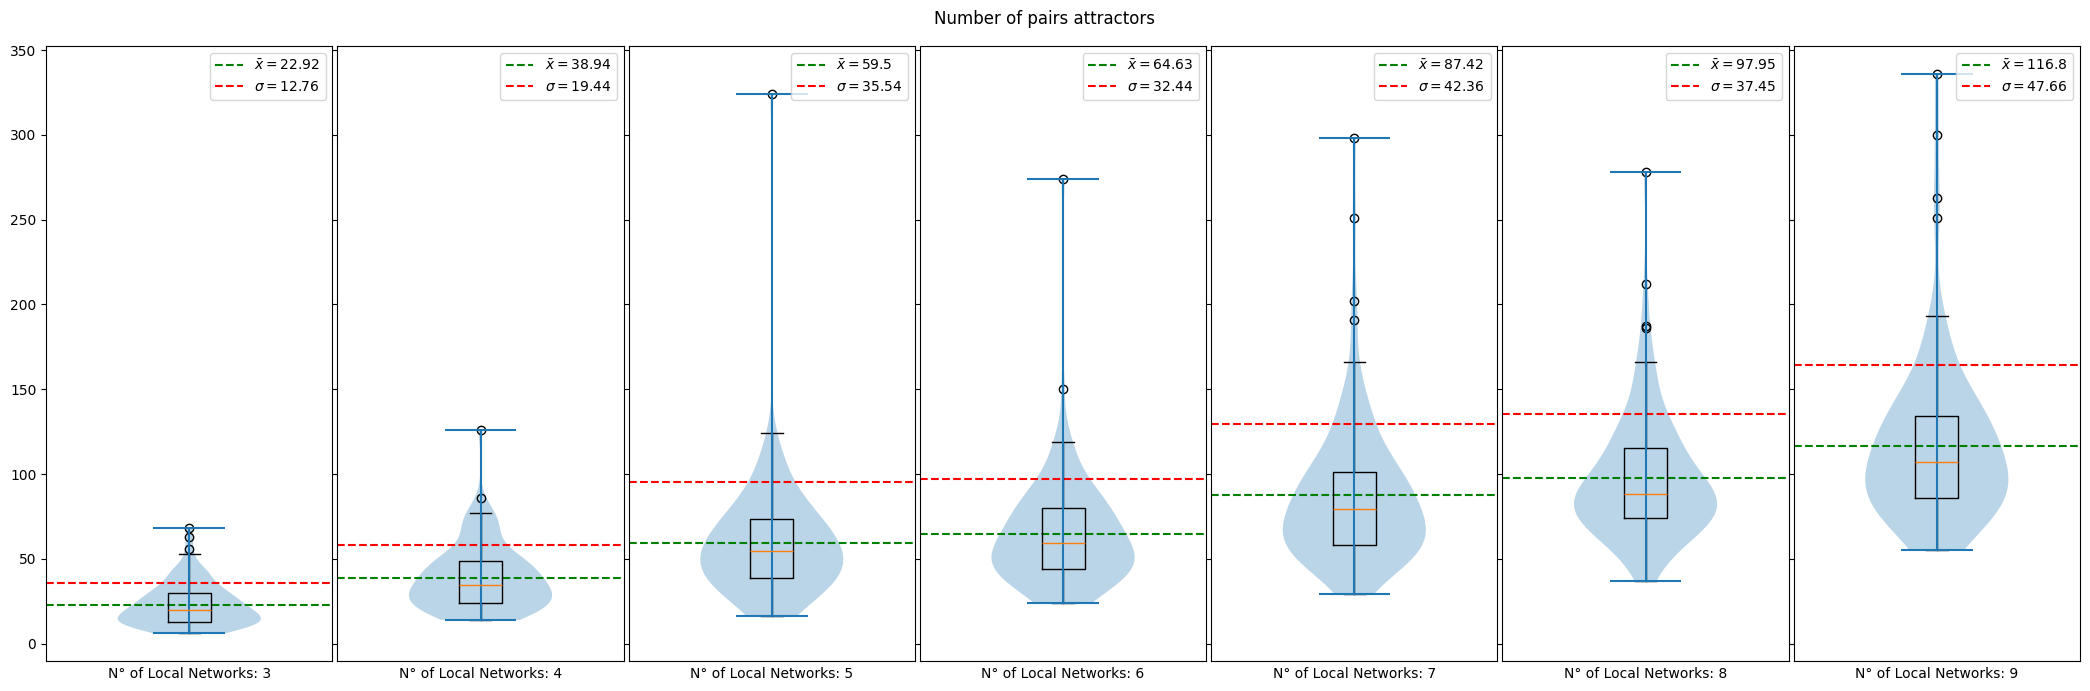

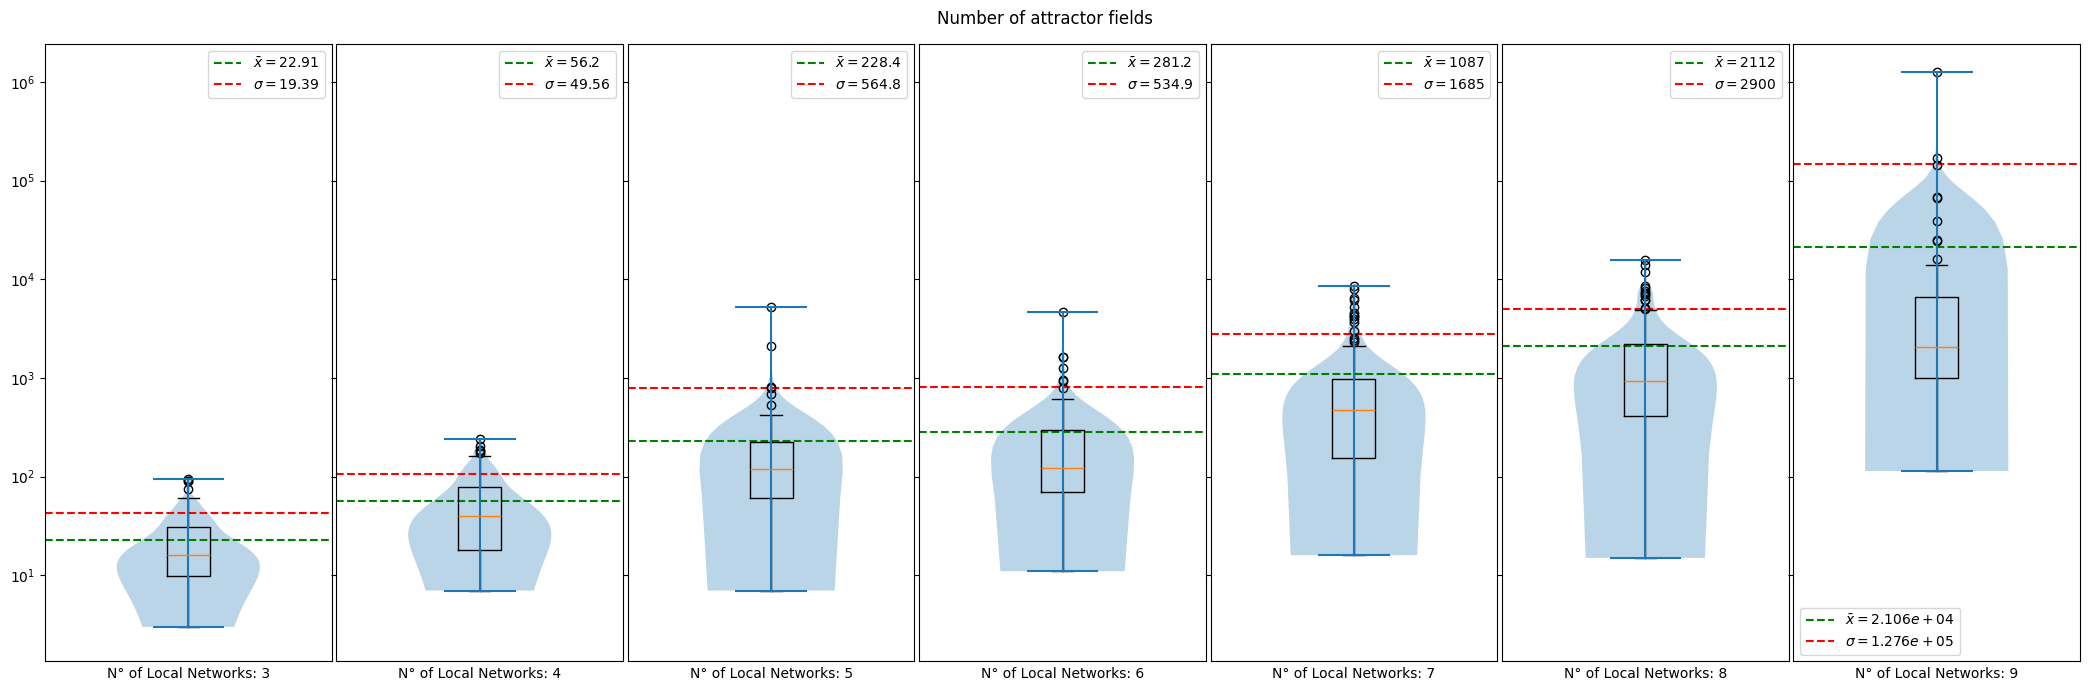

In [20]:
n_local_net = df['N_LOCAL_NETWORKS'].unique()
labels = {key:label for key, label in zip(df.keys()[-3:], [
          "Number of attractors",
          "Number of pairs attractors",
          "Number of attractor fields"])}
log_scale = {key:label for key, label in zip(df.keys()[-3:], [
          False,
          False,
          True])}
grouped = df.groupby("N_LOCAL_NETWORKS")

for key in df.keys()[-3:]:
    fig, axs = plt.subplots(1, n_local_net.size, figsize=(n_local_net.size * 3, 7), sharey=True)
    for ax, i_local_net in zip(axs, n_local_net):
        group = grouped.get_group(i_local_net)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g',ls='--',label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean()+data.std(), xmin=0.0, xmax=1.0, color='r',ls='--',label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'N° of Local Networks: {i_local_net}')
        ax.set_xticks([])
        ax.set_xlim((0.5,1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)